# ВКР Соболева А.Е. Часть вторая. Регрессоры (9), сравнение результатов по метрикам R2, MAE, MSE, RMSE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

### Загрузим датасет, очищенный от выбросов и сохранённый во 2 части ВКР 

In [3]:
result_clean = pd.read_excel(r"/home/alexander/Документы/BKP/result_clean.xlsx")

### Описание 

In [4]:
result_clean.describe()

,"Пропорции, %","Плотность, кг/м3","модуль упругости, ГПа","Отвердитель, %","Эпокс. группы, %","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,2.925683,1974.040023,738.247627,110.916216,22.209030,286.040414,482.993901,73.305127,2467.488822,217.613374,0.511752,6.915585,57.451895
std,0.893712,70.808120,328.708665,27.037891,2.394871,39.400677,280.190377,3.037381,463.838911,57.827255,0.500129,2.509672,11.239331
min,0.547391,1784.482245,2.436909,38.668500,15.695894,179.374391,0.603740,65.553336,1250.392802,63.685698,0.000000,0.037639,27.272928
25%,2.321931,1923.443748,498.577158,92.523816,20.571516,259.184486,266.004099,71.248823,2146.936034,179.489091,0.000000,5.134988,50.209656
50%,2.904731,1977.258043,738.736842,111.113175,22.184713,286.024118,457.732246,73.259230,2457.959767,218.388715,1.000000,6.943337,57.584225
75%,3.546650,2020.158764,958.418993,130.001450,23.961818,312.991425,695.900862,75.310788,2755.169485,256.396777,1.000000,8.591450,64.798211
max,5.314144,2161.565216,1649.415706,181.828448,28.955094,386.067992,1291.340115,81.417126,3705.672523,359.052220,1.000000,13.732404,86.012427


### При наличии столбца "Unnamed: 0", удаляем его с ключом inplace=True.

In [4]:
#result_clean.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
result_clean.head()

,"Пропорции, %","Плотность, кг/м3","модуль упругости, ГПа","Отвердитель, %","Эпокс. группы, %","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
1,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
2,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
3,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0
4,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,70.0


### Посмотрим на разброс величин средних значений столбцов

In [7]:
m = result_clean.describe()
m.loc[['mean', ]]

,"Пропорции, %","Плотность, кг/м3","модуль упругости, ГПа","Отвердитель, %","Эпокс. группы, %","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
mean,2.925683,1974.040023,738.247627,110.916216,22.20903,286.040414,482.993901,73.305127,2467.488822,217.613374,0.511752,6.915585,57.451895


### Значения величин в диапазоне от 2,9 до 2467,4.  Нарисуем оценку  плотности


<Axes: ylabel='Density'>

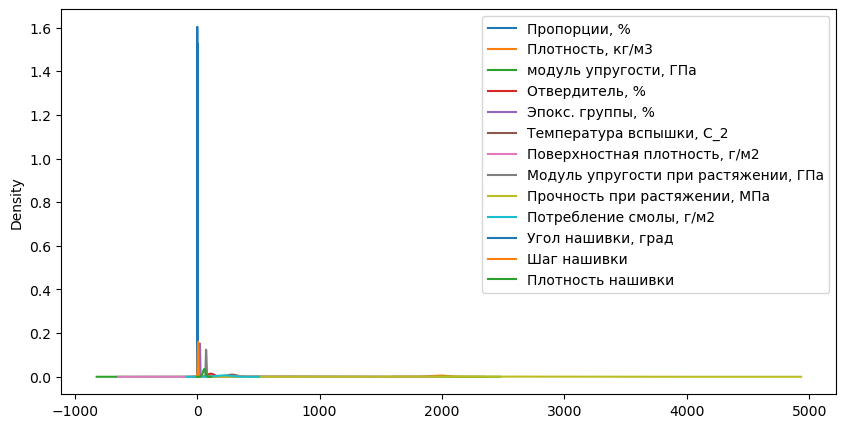

In [8]:
fig, ax = plt.subplots(figsize = (10, 5))
result_clean.plot(kind = 'kde', ax = ax)

### Разброс средних значений величин в диапазоне от 2,9 до 2467,4. Нужно нормализовать данные, применим MinMaxScaler так как он сохраняет форму исходного распределения. Нам это может быть важно при обучении нейронной сети  

### Обработаем данные целиком, а потом разделим на train, test.

In [4]:
scaler = MinMaxScaler()
# result_norm = scaler.fit_transform(result_clean)
result_norm = pd.DataFrame(scaler.fit_transform(result_clean), index=result_clean.index, columns=result_clean.columns)

In [10]:

mn = result_norm.describe()
mn.loc[['mean', 'max', 'min']]

,"Пропорции, %","Плотность, кг/м3","модуль упругости, ГПа","Отвердитель, %","Эпокс. группы, %","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
mean,0.498933,0.502695,0.446764,0.504664,0.491216,0.516059,0.373733,0.488647,0.495706,0.521141,0.511752,0.502232,0.513776
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Проверяем. Данные в диапазоне от min = 0 до max=1, среднее в районе 0.5

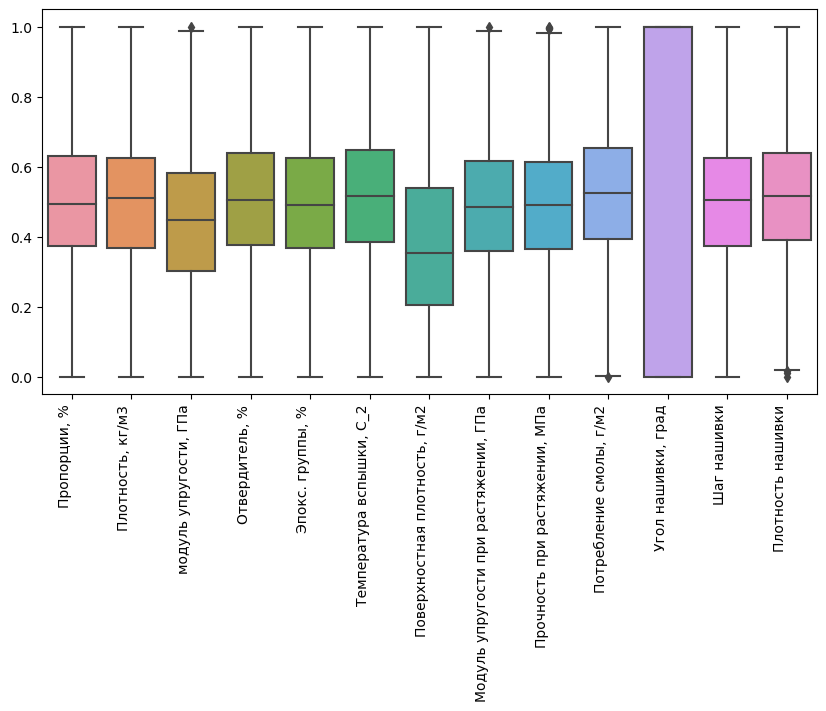

In [11]:
plt.figure(figsize = (10,5))
a = sns.boxplot(data = result_norm)
a.set_xticklabels(a.get_xticklabels(),rotation=90, ha="right");

#### Нарисуем тепловую карту корреляции параметров

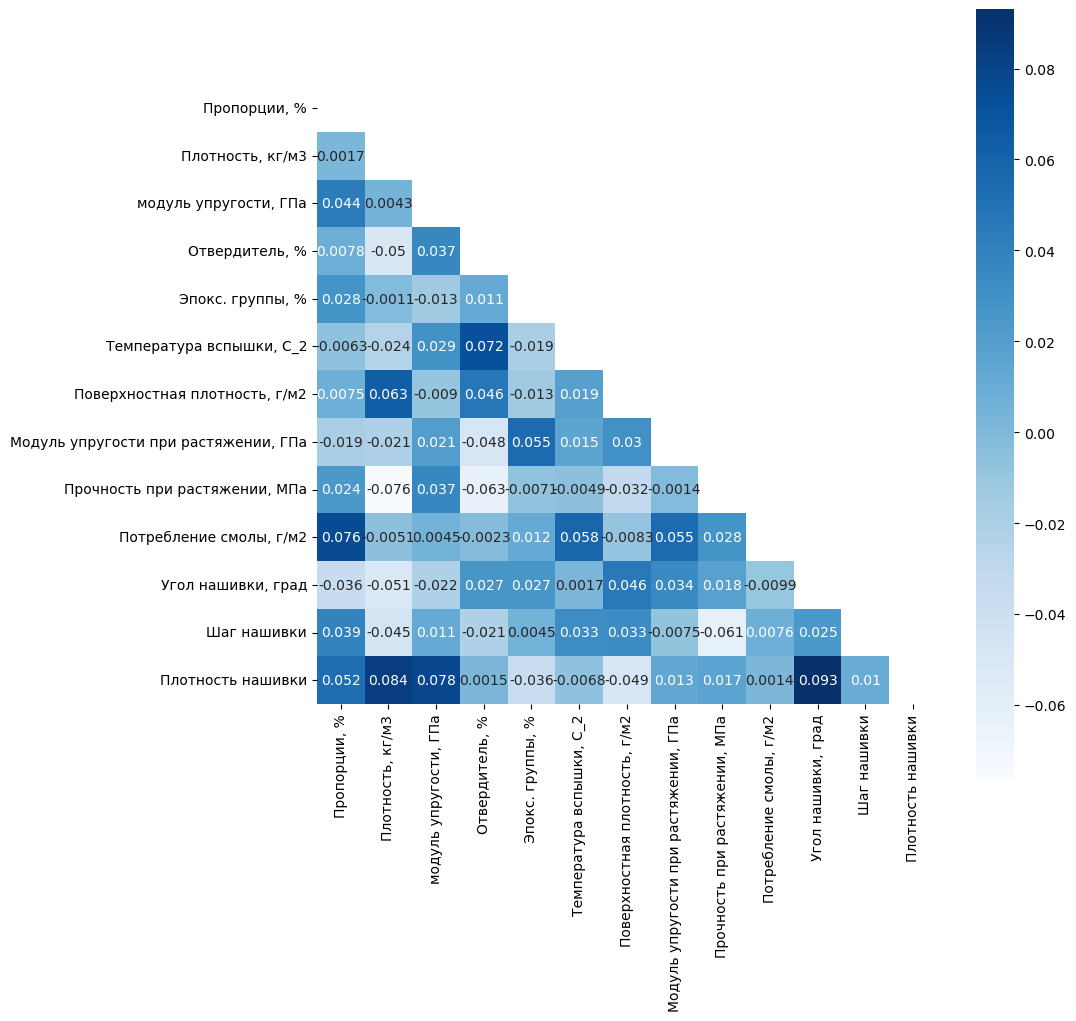

In [12]:
mask = np.triu(result_norm.corr())
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(result_norm.corr(), mask = mask, annot = True, square = True, cmap = 'Blues')
plt.xticks(rotation = 90)
plt.show()

### Из Задания на ВКР:  Обучить нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении.

### При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.

### разбиваем dataset на тестовую (30%) и тренировочную (70%) выборки, отделяем прогнозируемые значения: прочности при растяжении

### Список столбцов:

In [5]:
my_columns_list =  result_clean.columns.values.tolist()

In [6]:
print(my_columns_list)

['Пропорции, %', 'Плотность, кг/м3', 'модуль упругости, ГПа', 'Отвердитель, %', 'Эпокс. группы, %', 'Температура вспышки, С_2', 'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа', 'Потребление смолы, г/м2', 'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']


In [7]:
y1 = result_norm["Прочность при растяжении, МПа"]
x1 = result_norm.drop(columns = ["Прочность при растяжении, МПа"])

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x1, y1, test_size = 0.3, random_state = 64)

In [17]:
X_train1.head(3)

,"Пропорции, %","Плотность, кг/м3","модуль упругости, ГПа","Отвердитель, %","Эпокс. группы, %","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
895,0.255460,0.881287,0.515075,0.490364,0.713817,0.845739,0.562840,0.686598,0.465171,1.0,0.208260,0.663716
791,0.457162,0.898950,0.811452,0.237440,0.474119,0.215832,0.214211,0.466791,0.350344,1.0,0.507186,0.470402
900,0.780140,0.614478,0.478470,0.425326,0.341536,0.344289,0.770562,0.405327,0.429676,1.0,0.610875,0.557247


In [18]:
X_test1.head(3)

,"Пропорции, %","Плотность, кг/м3","модуль упругости, ГПа","Отвердитель, %","Эпокс. группы, %","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
592,0.687440,0.569471,0.848437,0.728435,0.394433,0.516313,0.294169,0.398889,0.735290,1.0,0.554239,0.626213
861,0.595384,0.491690,0.516162,0.130715,0.438300,0.472983,0.377478,0.445639,0.436803,1.0,0.504549,0.723067
122,0.534968,0.409673,0.223177,0.940108,0.571729,0.358537,0.196404,0.537171,0.880909,0.0,0.388373,0.220662


In [19]:
Y_train1.head(3)

895    0.484995
791    0.426707
900    0.396399
Name: Прочность при растяжении, МПа, dtype: float64

In [20]:
Y_test1.head(3)

592    0.37624
861    0.70898
122    0.24332
Name: Прочность при растяжении, МПа, dtype: float64

### Разбиение прошло корректно. Можно переходить к построению регрессии

In [21]:
from sklearn.linear_model import LinearRegression

### 1. Метод линейной регрессии

In [60]:
linear_r = LinearRegression()
linear_r.fit(X_train1, Y_train1)
Y_pred_linear = linear_r.predict(X_test1)
mae_linear = mean_absolute_error(Y_test1, Y_pred_linear).round(3)
mse_linear = mean_squared_error(Y_test1, Y_pred_linear).round(3)
mape_linear = mean_absolute_percentage_error(Y_test1, Y_pred_linear).round(3)
r2_linear_score = r2_score(Y_test1, Y_pred_linear).round(3)

In [61]:
print('Результаты линейной регрессии:') 
print('R2 Test score:  ', r2_linear_score)
print('Ср.абсолютная, Ср.абсолютная процентная, Среднеквадратичная ошибки')    
print('linear_MAE:     ', mae_linear)
print('linear_MAPE:    ', mape_linear)
print('linear_MSE:     ', mse_linear)
print('linear_RMSE:    ', np.sqrt(mse_linear).round(3))



Результаты линейной регрессии:
R2 Test score:   -0.03
Ср.абсолютная, Ср.абсолютная процентная, Среднеквадратичная ошибки
linear_MAE:      0.149
linear_MAPE:     0.431
linear_MSE:      0.037
linear_RMSE:     0.192


#### Нарисуем график тест/прогноз для модели линейной регрессии при значениях по умолчанию

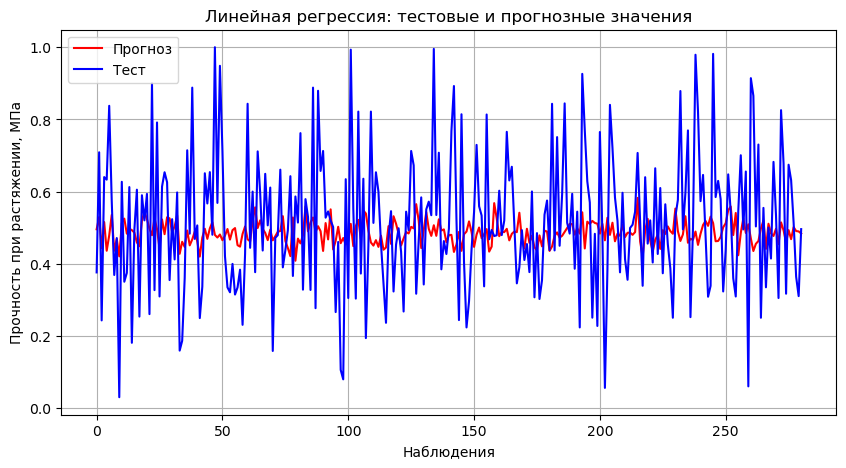

In [39]:
plt.figure(figsize = (10, 5))
plt.title('Линейная регрессия: тестовые и прогнозные значения')
plt.xlabel('Наблюдения')
plt.ylabel('Прочность при растяжении, МПа')
plt.plot(Y_pred_linear, label="Прогноз", color = 'red')
plt.plot(Y_test1.values, label = "Тест", color = 'blue')
plt.legend()
plt.grid(True);

#### Потреннируемся в поиске гиперпараметровпо сетке на простом методе. Смысла в GridSearchCV для линейной регрессии нет, но можно написать код. 
#### По описанию (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), в методе параметров для настройки практически нет, а из того, что есть, можно попробовать менять n_jobs и таким образом освоить метод GridSearchCV. 

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
linear_optim2 = LinearRegression()
linear_optim2_params = {'n_jobs' :  range(3, 30)}   

#### Выполним поиск параметров по сетке. Для оценки результата используем коэффициент детерминации R^2. 

In [43]:
lin_gs_optim2 = GridSearchCV(linear_optim2, linear_optim2_params, cv = 10, verbose = 1, scoring = 'r2')
lin_gs_optim2.fit(X_train1, Y_train1)


Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'n_jobs': range(3, 30)}, scoring='r2', verbose=1)

In [59]:
print('оптимальные гиперпараметры для  модели')
print(lin_gs_optim2.best_estimator_)
print(lin_gs_optim2.best_params_)
print('\n')
grid_search_lin = lin_gs_optim2.best_estimator_

оптимальные гиперпараметры для  модели
LinearRegression(n_jobs=3)
{'n_jobs': 3}




#### Подставим в метод n_jobs = 3

In [62]:
linear_r2 = LinearRegression(n_jobs = 3)
linear_r2.fit(X_train1, Y_train1)
Y_pred_linear2 = linear_r2.predict(X_test1)
mae_linear2 = mean_absolute_error(Y_test1, Y_pred_linear2).round(3)
mse_linear2 = mean_squared_error(Y_test1, Y_pred_linear2).round(3)
mape_linear2 = mean_absolute_percentage_error(Y_test1, Y_pred_linear2).round(3)
r2_linear_score2 = r2_score(Y_test1, Y_pred_linear2).round(3)

In [64]:
print('Результаты оптимизации линейной регрессии:') 
print('R2 Test score:  ', r2_linear_score2) 
print('Ср.абсолютная, Ср.абсолютная процентная, Среднеквадратичная ошибки')    
print('linear_MAE:  ', mae_linear2)
print('linear_MAPE: ', mape_linear2)
print('linear_MSE:  ', mse_linear2)
print('linear_RMSE: ', np.sqrt(mse_linear2).round(3))

Результаты оптимизации линейной регрессии:
R2 Test score:   -0.03
Ср.абсолютная, Ср.абсолютная процентная, Среднеквадратичная ошибки
linear_MAE:   0.149
linear_MAPE:  0.431
linear_MSE:   0.037
linear_RMSE:  0.192


#### Время выполнения стало меньше. 

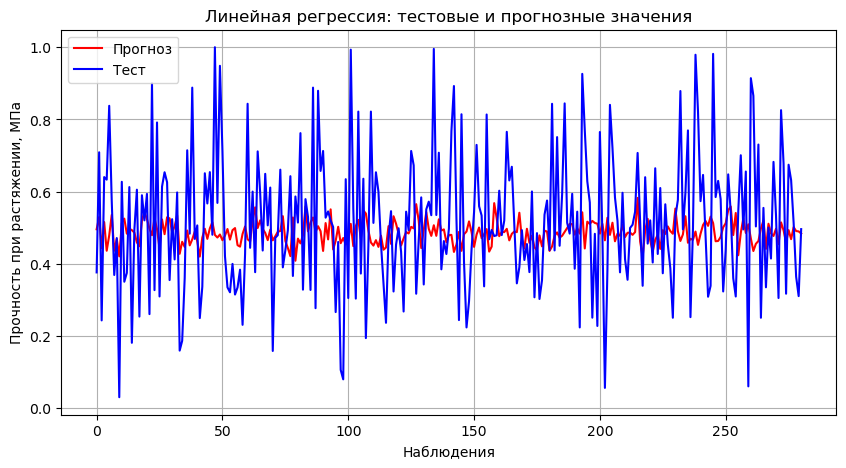

In [48]:
plt.figure(figsize = (10, 5))
plt.title('Линейная регрессия: тестовые и прогнозные значения')
plt.xlabel('Наблюдения')
plt.ylabel('Прочность при растяжении, МПа')
plt.plot(Y_pred_linear2, label="Прогноз", color = 'red')
plt.plot(Y_test1.values, label = "Тест", color = 'blue')
plt.legend()
plt.grid(True);

###  2. Метод К ближайших соседей

In [49]:
from sklearn.neighbors import KNeighborsRegressor

In [51]:
knn_r = KNeighborsRegressor(n_neighbors = 3)
knn_r.fit(X_train1, Y_train1)
Y_pred_knn = knn_r.predict(X_test1)
mae_knn = mean_absolute_error(Y_test1, Y_pred_knn).round(3)
mse_knn = mean_squared_error(Y_test1,Y_pred_knn).round(3)
mape_knn = mean_absolute_percentage_error(Y_test1, Y_pred_knn).round(3)
r2_knn_score = r2_score(Y_test1, Y_pred_knn).round(3)

In [53]:
print('Результаты Метода К ближайших соседей:')
print('R2 Test score:  ', r2_knn_score)
print('Ср.абсолютная, Ср.абсолютная процентная, Среднеквадратичная ошибки')
print('knn_MAE:        ', mae_knn )
print('knn_MAPE:       ', mape_knn)
print('knn_MSE:        ', mse_knn)
print('knn_RMSE:       ', np.sqrt(mse_knn).round(3))


Результаты Метода К ближайших соседей:
R2 Test score:   -0.366
Ср.абсолютная, Ср.абсолютная процентная, Среднеквадратичная ошибки
knn_MAE:         0.175
knn_MAPE:        0.505
knn_MSE:         0.048
knn_RMSE:        0.219


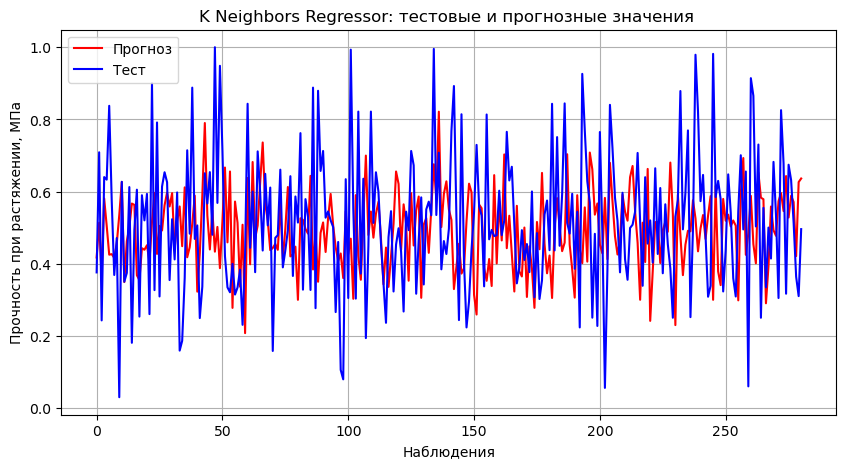

In [54]:
plt.figure(figsize = (10, 5))
plt.title('K Neighbors Regressor: тестовые и прогнозные значения ')
plt.xlabel('Наблюдения')
plt.ylabel('Прочность при растяжении, МПа')
plt.plot(Y_pred_knn, label = 'Прогноз', color = 'red')
plt.plot(Y_test1.values, label = 'Тест', color = 'blue')

plt.legend()
plt.grid(True);

#### По заданию произведём поиск гиперпараметровпо сетке с перекрстной проверкой и количеством блоков = 10

In [55]:
from sklearn.model_selection import GridSearchCV

#### В методе KNeighborsRegressor по описанию 
#### https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html  
#### можно менять: число соседей('n_neighbors'), веса функций в предсказании('weights'),  четыре варианта алгоритма для вычисления ближайших соседей('algorithm') размер листа для двух алгоритмов (BallTree и KDTree) вычисления ближайших соседей(leaf_size), 

#### Создадим списки параметров для GridSearchCV 

In [56]:
knn_optim2 = KNeighborsRegressor()
knn_optim2_params = {'n_neighbors' : range(1, 10), 'weights' : ['uniform', 'distance'], 
                'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

#### Обучаем модель. Для оценки результата используем коэффициент детерминации R^2. Если коэффициент окажется <0, то наша модель работает хуже линейной регрессии.

In [57]:
knn_gs_optim2 = GridSearchCV(knn_optim2, knn_optim2_params, cv = 10, verbose = 1, 
                         n_jobs= 20, scoring = 'r2')
knn_gs_optim2.fit(X_train1, Y_train1)


Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=20,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(1, 10),
                         'weights': ['uniform', 'distance']},
             scoring='r2', verbose=1)

#### Выводим гиперпараметры для оптимальной модели

In [58]:
print('оптимальные гиперпараметры для  модели KNeighborsRegressor')
print(knn_gs_optim2.best_estimator_)
print(knn_gs_optim2.best_params_)
grid_search_knn = knn_gs_optim2.best_estimator_

оптимальные гиперпараметры для  модели KNeighborsRegressor
KNeighborsRegressor(n_neighbors=9)
{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}


In [65]:
knn_r2 = KNeighborsRegressor(n_neighbors = 9, algorithm = 'auto', weights = 'uniform' )
knn_r2.fit(X_train1, Y_train1)
Y_pred_knn2 = knn_r2.predict(X_test1).round(3)
mae_knn2 = mean_absolute_error(Y_test1, Y_pred_knn2).round(3)
mse_knn2 = mean_squared_error(Y_test1,Y_pred_knn2).round(3)
mape_knn2 = mean_absolute_percentage_error(Y_test1, Y_pred_knn2).round(3)
r2_knn_score2 = r2_score(Y_test1, Y_pred_knn2).round(3)

In [66]:
print('Результаты оптимизации Метода К ближайших соседей:')
print('R2 Test score:  ', r2_knn_score2)
print('Ср.абсолютная, Ср.абсолютная процентная, Среднеквадратичная ошибки')
print('knn_MAE:        ', mae_knn2 )
print('knn_MAPE:       ', mape_knn2)
print('knn_MSE:        ', mse_knn2)
print('knn_RMSE:       ', np.sqrt(mse_knn2).round(3))

Результаты оптимизации Метода К ближайших соседей:
R2 Test score:   -0.138
Ср.абсолютная, Ср.абсолютная процентная, Среднеквадратичная ошибки
knn_MAE:         0.157
knn_MAPE:        0.479
knn_MSE:         0.04
knn_RMSE:        0.2


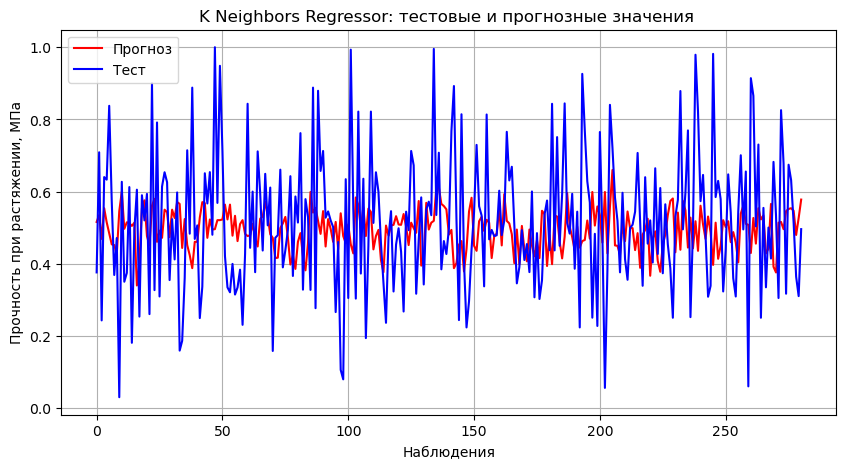

In [42]:
plt.figure(figsize = (10, 5))
plt.title('K Neighbors Regressor: тестовые и прогнозные значения ')
plt.xlabel('Наблюдения')
plt.ylabel('Прочность при растяжении, МПа')
plt.plot(Y_pred_knn2, label = 'Прогноз', color = 'red')
plt.plot(Y_test1.values, label = 'Тест', color = 'blue')

plt.legend()
plt.grid(True);

### 3. Метод опорных векторов

In [68]:
from sklearn.svm import SVR
from sklearn import svm

C (float), Positive only.  The strength of the regularization is inversely proportional to C.

epsilon (float)  Positive only. It specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.

In [69]:
svr_r = svm.SVR()
svr_r.fit(X_train1, Y_train1)
Y_pred_svr = svr_r.predict(X_test1)
mae_svr = mean_absolute_error(Y_test1, Y_pred_svr).round(3)
mse_svr = mean_squared_error(Y_test1,Y_pred_svr).round(3)
mape_svr = mean_absolute_percentage_error(Y_test1, Y_pred_svr).round(3)
r2_svr_score = r2_score(Y_test1, Y_pred_svr).round(3)

In [70]:
print('Результаты Метода Опорных векторов:') 
print('R2 Test score:  ', r2_svr_score)
print('Ср.абсолютная, Ср.абсолютная процентная, Среднеквадратичная ошибки')
print('svr_MAE:        ', mae_svr)
print('svr_MAPE:       ', mape_svr)
print('svr_MSE:        ', mse_svr)
print('svr_RMSE:       ', np.sqrt(mse_svr).round(3))


Результаты Метода Опорных векторов:
R2 Test score:   -0.327
Ср.абсолютная, Ср.абсолютная процентная, Среднеквадратичная ошибки
svr_MAE:         0.168
svr_MAPE:        0.491
svr_MSE:         0.047
svr_RMSE:        0.217


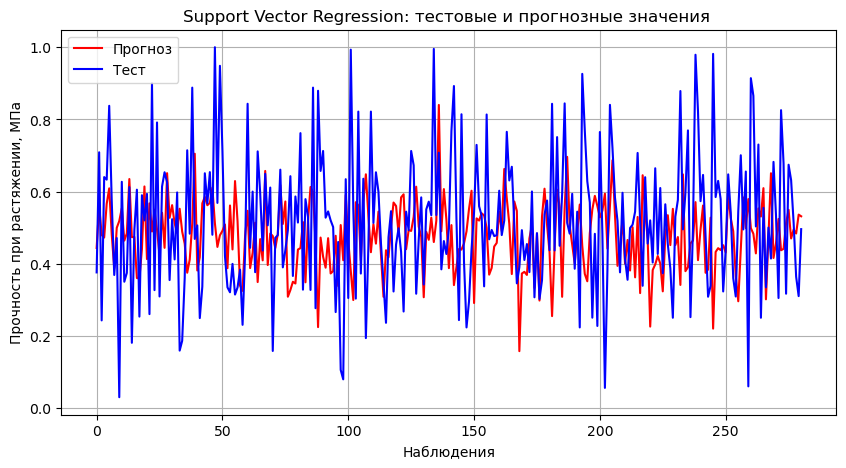

In [46]:
plt.figure(figsize = (10, 5))
plt.title('Support Vector Regression: тестовые и прогнозные значения ')
plt.xlabel('Наблюдения')
plt.ylabel('Прочность при растяжении, МПа')
plt.plot(Y_pred_svr, label = "Прогноз", color = 'red')
plt.plot(Y_test1.values, label = "Тест", color = 'blue')

plt.legend()
plt.grid(True);


#### По заданию произведём поиск гиперпараметровпо сетке с перекрстной проверкой и количеством блоков = 10

#### В методе  по описанию 
#### https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR
#### можно менять: тип ядра для использования в алгоритмах (kernel), допуск критерия остановки (tol), регуляризация (С)

#### Создадим списки параметров для GridSearchCV 

In [72]:
svr_optim2 = svm.SVR()
svr_optim2_params = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], 'C' : range(1, 3)}

#### Обучаем модель. Для оценки результата используем коэффициент детерминации R^2.

In [73]:
svr_gs_optim2 = GridSearchCV(svr_optim2, svr_optim2_params, cv = 10, verbose = 1, n_jobs= 20, scoring = 'r2')
svr_gs_optim2.fit(X_train1, Y_train1)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10, estimator=SVR(), n_jobs=20,
             param_grid={'C': range(1, 3),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='r2', verbose=1)

#### Выводим гиперпараметры для оптимальной модели

In [74]:
print('оптимальные гиперпараметры для модели')
print(svr_gs_optim2.best_estimator_)
print(svr_gs_optim2.best_params_)
grid_search_svr = svr_gs_optim2.best_estimator_


оптимальные гиперпараметры для модели
SVR(C=2, kernel='linear')
{'C': 2, 'kernel': 'linear'}


In [79]:
svr_r2 = svm.SVR(kernel='linear', gamma='scale',  tol=0.01, C=2, epsilon=0.001, shrinking=True, 
                cache_size=20, verbose=False, max_iter= 120)
#C=5, 
svr_r2.fit(X_train1, Y_train1)
Y_pred_svr2 = svr_r2.predict(X_test1).round(3)
mae_svr2 = mean_absolute_error(Y_test1, Y_pred_svr2).round(3)
mse_svr2 = mean_squared_error(Y_test1,Y_pred_svr2).round(3)
mape_svr2 = mean_absolute_percentage_error(Y_test1, Y_pred_svr2).round(3)
r2_svr_score2 = r2_score(Y_test1, Y_pred_svr2).round(3)

/home/alexander/miniconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=120).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [80]:
print('Результаты оптимизации Метода Опорных векторов') 
print('R2 Test score:  ', r2_svr_score2)
print('Ср.абсолютная, Ср.абсолютная процентная, Среднеквадратичная ошибки')
print('svr_MAE:        ', mae_svr2)
print('svr_MAPE:       ', mape_svr2)
print('svr_MSE:        ', mse_svr2)
print('svr_RMSE:       ', np.sqrt(mse_svr2).round(3))

Результаты оптимизации Метода Опорных векторов
R2 Test score:   -0.333
Ср.абсолютная, Ср.абсолютная процентная, Среднеквадратичная ошибки
svr_MAE:         0.171
svr_MAPE:        0.458
svr_MSE:         0.047
svr_RMSE:        0.217


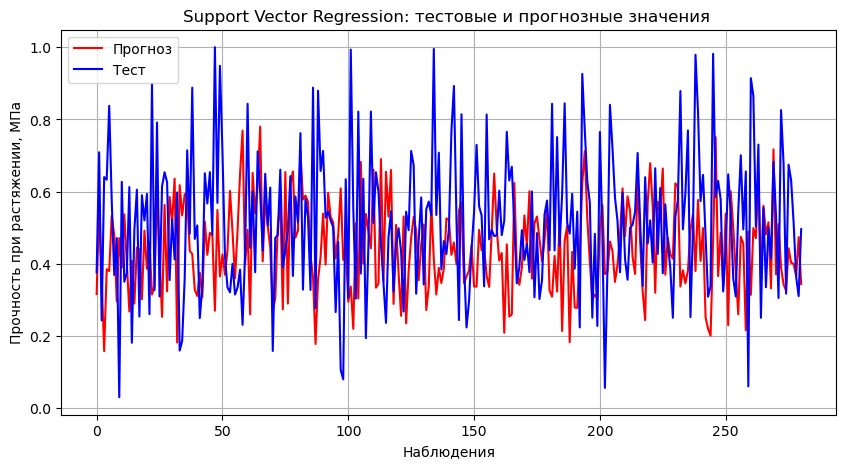

In [52]:
plt.figure(figsize = (10, 5))
plt.title('Support Vector Regression: тестовые и прогнозные значения ')
plt.xlabel('Наблюдения')
plt.ylabel('Прочность при растяжении, МПа')
plt.plot(Y_pred_svr2, label = "Прогноз", color = 'red')
plt.plot(Y_test1.values, label = "Тест", color = 'blue')

plt.legend()
plt.grid(True);


### 4. Метод случайного леса 

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
randomf_r = RandomForestRegressor(n_estimators=50, max_depth=20, random_state=1)
randomf_r.fit(X_train1, Y_train1)
Y_pred_rf = randomf_r.predict(X_test1)
mae_randomf = mean_absolute_error(Y_test1, Y_pred_rf).round(3)
mse_randomf = mean_squared_error(Y_test1,Y_pred_rf).round(3)
mape_randomf = mean_absolute_percentage_error(Y_test1, Y_pred_rf).round(3)
r2_randomf_score = r2_score(Y_test1, Y_pred_rf).round(3)

In [83]:
print('Результаты Метода случайного леса')
print('R2 Test score:   ', r2_randomf_score) 
print('Ср.абсолютная, Ср.абсолютная процентная, Среднеквадратичная ошибки')
print('randomf_MAE:     ', mae_randomf)
print('randomf_MAPE:    ', mape_randomf)
print('randomf_MSE:     ', mse_randomf)
print('randomf_RMSE:    ', np.sqrt(mse_randomf).round(3))


Результаты Метода случайного леса
R2 Test score:    -0.052
Ср.абсолютная, Ср.абсолютная процентная, Среднеквадратичная ошибки
randomf_MAE:      0.152
randomf_MAPE:     0.443
randomf_MSE:      0.037
randomf_RMSE:     0.192


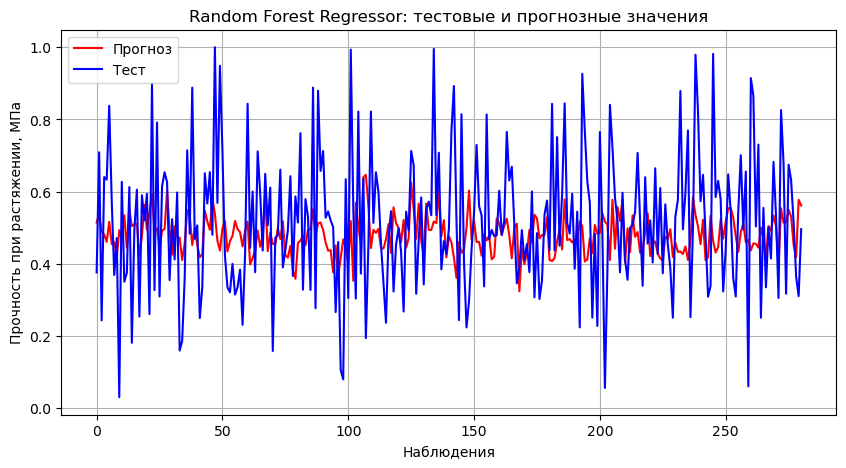

In [56]:
plt.figure(figsize = (10, 5))
plt.title('Random Forest Regressor: тестовые и прогнозные значения')
plt.xlabel('Наблюдения')
plt.ylabel('Прочность при растяжении, МПа')
plt.plot(Y_pred_rf, label = 'Прогноз', color = 'red')
plt.plot(Y_test1.values, label = 'Тест', color = 'blue')
plt.legend()
plt.grid(True);

#### По заданию произведём поиск гиперпараметровпо сетке с перекрстной проверкой и количеством блоков = 10

#### В методе KNeighborsRegressor по описанию 
#### https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html  
#### можно менять:  число деревьев в лесу (n_estimators), функция измерения качества разделения (criterion), глубина дерева (max_depth), количество образцов для разделения внутреннего узла (min_samples_split) и т д.

In [84]:
randomf_optim2 = RandomForestRegressor()
randomf_optim2_params = {'n_estimators': [10, 100], 'max_depth': [3, 10],  
                         'criterion': ['squared_error', 'absolute_error', 'friedman_mse'] }


#### Обучаем модель. Для оценки результата используем коэффициент детерминации R^2.

In [85]:
randomf_gs_optim2 = GridSearchCV(randomf_optim2, randomf_optim2_params, cv = 10, 
                                 verbose = 1, n_jobs= 20, scoring = 'r2')
randomf_gs_optim2.fit(X_train1, Y_train1)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=20,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse'],
                         'max_depth': [3, 10], 'n_estimators': [10, 100]},
             scoring='r2', verbose=1)

#### Выводим гиперпараметры для оптимальной модели

In [86]:
print('оптимальные гиперпараметры для модели RandomForestRegressor')
print(randomf_gs_optim2.best_estimator_)
print(randomf_gs_optim2.best_params_)
grid_search_randomf = randomf_gs_optim2.best_estimator_

оптимальные гиперпараметры для модели RandomForestRegressor
RandomForestRegressor(max_depth=3)
{'criterion': 'squared_error', 'max_depth': 3, 'n_estimators': 100}


#### Подставим найденные параметры и посмотрим на изменения

In [87]:
randomf_r2 = RandomForestRegressor(n_estimators=100, criterion='friedman_mse', max_depth=3, random_state=1)
randomf_r2.fit(X_train1, Y_train1)
Y_pred_rf2 = randomf_r2.predict(X_test1)
mae_randomf2 = mean_absolute_error(Y_test1, Y_pred_rf2).round(3)
mse_randomf2 = mean_squared_error(Y_test1,Y_pred_rf2).round(3)
mape_randomf2 = mean_absolute_percentage_error(Y_test1, Y_pred_rf2).round(3)
r2_randomf_score2 = r2_score(Y_test1, Y_pred_rf2).round(3)

In [88]:
print('Результаты оптимизации Метода случайного леса')
print('R2 Test score:   ', r2_randomf_score2) 
print('Ср.абсолютная, Ср.абсолютная процентная, Среднеквадратичная ошибки')
print('randomf_MAE:     ', mae_randomf2)
print('randomf_MAPE:    ', mape_randomf2)
print('randomf_MSE:     ', mse_randomf2)
print('randomf_RMSE:    ', np.sqrt(mse_randomf2).round(3))

Результаты оптимизации Метода случайного леса
R2 Test score:    -0.023
Ср.абсолютная, Ср.абсолютная процентная, Среднеквадратичная ошибки
randomf_MAE:      0.148
randomf_MAPE:     0.439
randomf_MSE:      0.036
randomf_RMSE:     0.19


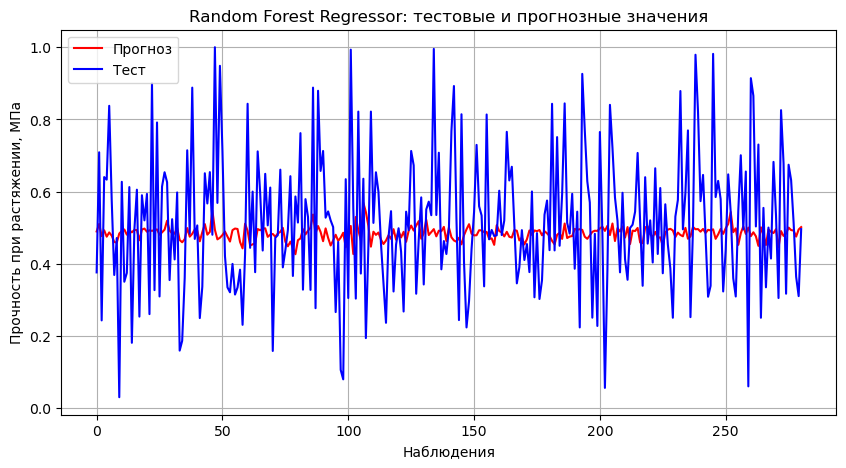

In [62]:
plt.figure(figsize = (10, 5))
plt.title('Random Forest Regressor: тестовые и прогнозные значения')
plt.xlabel('Наблюдения')
plt.ylabel('Прочность при растяжении, МПа')
plt.plot(Y_pred_rf2, label = 'Прогноз', color = 'red')
plt.plot(Y_test1.values, label = 'Тест', color = 'blue')
plt.legend()
plt.grid(True);

### 5. Деревья решений

In [89]:
from sklearn.tree import DecisionTreeRegressor

In [92]:
dec_tree_r = DecisionTreeRegressor()
dec_tree_r.fit(X_train1, Y_train1)
Y_pred_tree = dec_tree_r.predict(X_test1)
mae_dec_tree = mean_absolute_error(Y_test1, Y_pred_tree).round(3)
mse_dec_tree = mean_squared_error(Y_test1, Y_pred_tree).round(3)
mape_dec_tree = mean_absolute_percentage_error(Y_test1, Y_pred_tree).round(3)
r2_dec_tree_score = r2_score(Y_test1, Y_pred_tree).round(3)

In [93]:
print('Результаты метода DecisionTreeRegressor:')
print('R2 Test score:   ', r2_dec_tree_score)
print('Ср.абсолютная, Ср.абсолютная процентная, Среднеквадратичная ошибки')
print('dec_tree_MAE:    ', mae_dec_tree)
print('dec_tree_MAPE:   ', mape_dec_tree)
print('dec_tree_MSE:    ', mse_dec_tree)
print('dec_tree_RMSE:   ', np.sqrt(mse_dec_tree).round(3))



Результаты метода DecisionTreeRegressor:
R2 Test score:    -1.183
Ср.абсолютная, Ср.абсолютная процентная, Среднеквадратичная ошибки
dec_tree_MAE:     0.227
dec_tree_MAPE:    0.595
dec_tree_MSE:     0.077
dec_tree_RMSE:    0.277


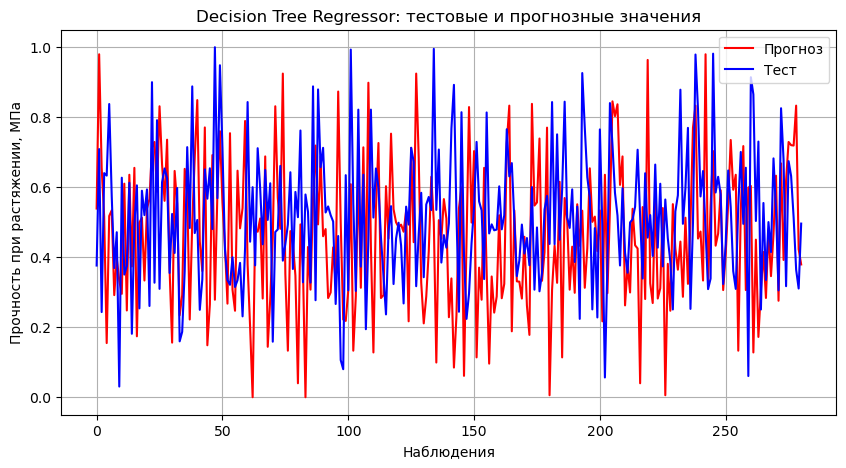

In [66]:
plt.figure(figsize = (10, 5))
plt.title('Decision Tree Regressor: тестовые и прогнозные значения')
plt.xlabel('Наблюдения')
plt.ylabel('Прочность при растяжении, МПа')
plt.plot(Y_pred_tree, label = "Прогноз", color = 'red')
plt.plot(Y_test1.values, label = "Тест", color = 'blue')
plt.legend()
plt.grid(True);

#### По заданию произведём поиск гиперпараметровпо сетке с перекрстной проверкой и количеством блоков = 10
#### В методе DecisionTreeRegressor по описанию 
#### https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
#### выберем : функцию измерения качества разделения criterion, стратегию выбора деления узла splitter, максимальную глубину дерева max_depth int, минимальный вес фракции в полной сумме весов min_weight_fraction_leaf и т д.


In [94]:
dec_tree_r2 = DecisionTreeRegressor()
dec_tree_optim2_params = {'criterion': ['squared_error', 'absolute_error', 'friedman_mse'], 
                            'splitter' : ['best', 'random'],  'max_depth' : [4],   
                            'min_samples_split' : [2], 'min_weight_fraction_leaf' : [0.0, 0.5],}

#### Обучаем модель. Для оценки результата используем коэффициент детерминации R^2.

In [95]:
dec_tree_gs_optim2 = GridSearchCV(dec_tree_r2, dec_tree_optim2_params, cv = 10, verbose = 1, n_jobs= 20, scoring = 'r2')
dec_tree_gs_optim2.fit(X_train1, Y_train1)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=20,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse'],
                         'max_depth': [4], 'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0, 0.5],
                         'splitter': ['best', 'random']},
             scoring='r2', verbose=1)

#### Выводим гиперпараметры для оптимальной модели

In [96]:
print('оптимальные гиперпараметры для модели DecisionTreeRegressor')
print(dec_tree_gs_optim2.best_estimator_)
print(dec_tree_gs_optim2.best_params_)
grid_search_dec_tree = dec_tree_gs_optim2.best_estimator_


оптимальные гиперпараметры для модели DecisionTreeRegressor
DecisionTreeRegressor(criterion='absolute_error', max_depth=4,
                      min_weight_fraction_leaf=0.5, splitter='random')
{'criterion': 'absolute_error', 'max_depth': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.5, 'splitter': 'random'}


#### Подставим найденные параметры и посмотрим на изменения

In [97]:
dec_tree_r2 = DecisionTreeRegressor(criterion='absolute_error', max_depth=4, 
                        min_samples_split = 2, min_weight_fraction_leaf = 0.5, splitter = 'random')
dec_tree_r2.fit(X_train1, Y_train1)
Y_pred_tree2 = dec_tree_r2.predict(X_test1)
mae_dec_tree2 = mean_absolute_error(Y_test1, Y_pred_tree2).round(3)
mse_dec_tree2 = mean_squared_error(Y_test1,Y_pred_tree2).round(3)
mape_dec_tree2 = mean_absolute_percentage_error(Y_test1, Y_pred_tree2).round(3)
r2_dec_tree_score2 = r2_score(Y_test1, Y_pred_tree2).round(3)

In [98]:
print('Результаты оптимизации Метода DecisionTreeRegressor')
print('R2 Test score:    ', r2_dec_tree_score2) 
print('Ср.абсолютная, Ср.абсолютная процентная, Среднеквадратичная ошибки')
print('randomf_MAE:      ', mae_dec_tree2)
print('randomf_MAPE:     ', mape_dec_tree2)
print('randomf_MSE:      ', mse_dec_tree2)
print('randomf_RMSE:     ', np.sqrt(mse_dec_tree2).round(3))

Результаты оптимизации Метода DecisionTreeRegressor
R2 Test score:     -0.029
Ср.абсолютная, Ср.абсолютная процентная, Среднеквадратичная ошибки
randomf_MAE:       0.149
randomf_MAPE:      0.438
randomf_MSE:       0.036
randomf_RMSE:      0.19


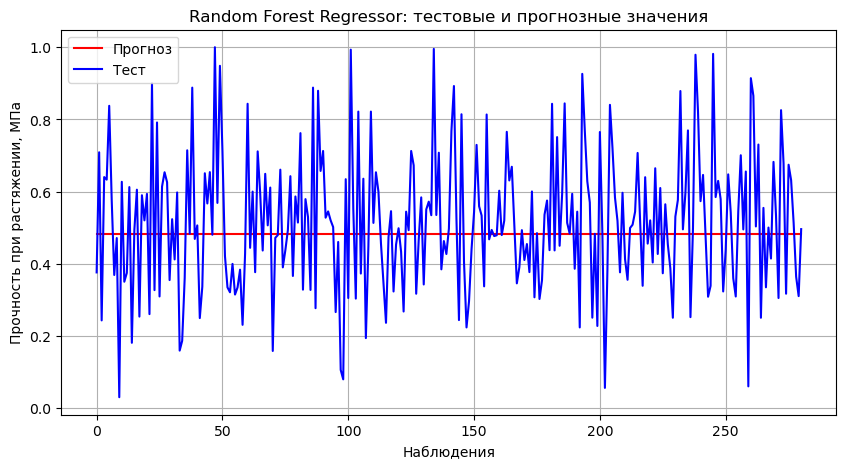

In [100]:
plt.figure(figsize = (10, 5))
plt.title('Random Forest Regressor: тестовые и прогнозные значения')
plt.xlabel('Наблюдения')
plt.ylabel('Прочность при растяжении, МПа')
plt.plot(Y_pred_tree2, label = 'Прогноз', color = 'red')
plt.plot(Y_test1.values, label = 'Тест', color = 'blue')
plt.legend()
plt.grid(True);

### 6. Метод градиентного бустинга

In [101]:
from sklearn.ensemble import GradientBoostingRegressor

In [103]:
gboost_r = GradientBoostingRegressor()
gboost_r.fit(X_train1, Y_train1)
Y_pred_gboost = gboost_r.predict(X_test1)
mae_gboost = mean_absolute_error(Y_test1, Y_pred_gboost).round(3)
mse_gboost = mean_squared_error(Y_test1,Y_pred_gboost).round(3)
mape_gboost = mean_absolute_percentage_error(Y_test1, Y_pred_gboost).round(3)
r2_gboost_score = r2_score(Y_test1, Y_pred_gboost).round(3)

In [104]:
print('Результаты метода GradientBoostingRegressor')
print('R2 Test score: ', r2_gboost_score)
print('Ср.абсолютная, Ср.абсолютная процентная, Среднеквадратичная ошибки')
print('gbr_MAE:       ', mae_gboost)
print('gbr_MAPE:      ', mape_gboost)
print('gbr_MSE:       ', mse_gboost)
print('gbr_RMSE:      ', np.sqrt(mse_gboost).round(3))


Результаты метода GradientBoostingRegressor
R2 Test score:  -0.129
Ср.абсолютная, Ср.абсолютная процентная, Среднеквадратичная ошибки
gbr_MAE:        0.155
gbr_MAPE:       0.463
gbr_MSE:        0.04
gbr_RMSE:       0.2


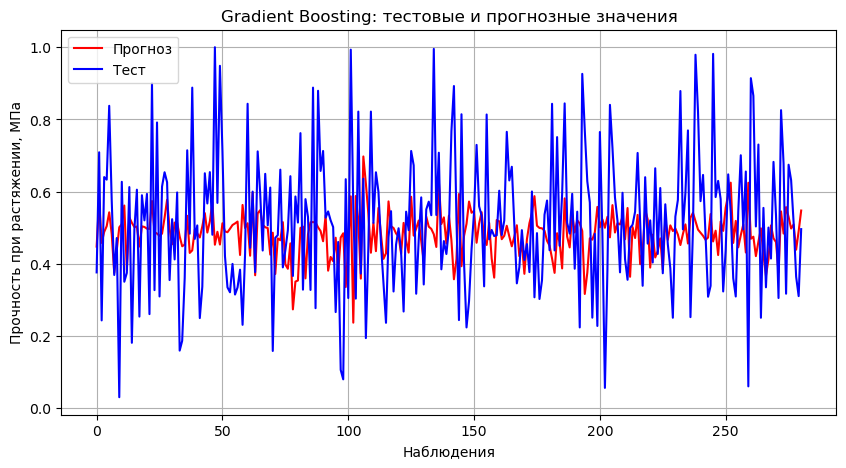

In [76]:
plt.figure(figsize = (10, 5))
plt.title('Gradient Boosting: тестовые и прогнозные значения')
plt.xlabel('Наблюдения')
plt.ylabel('Прочность при растяжении, МПа')
plt.plot(Y_pred_gboost, label = 'Прогноз', color = 'red')
plt.plot(Y_test1.values, label = 'Тест', color = 'blue')
plt.legend()
plt.grid(True);

#### По заданию произведём поиск гиперпараметровпо сетке с перекрстной проверкой и количеством блоков = 10
#### В методе Gradient Boosting по описанию https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html  можно менять достаточно много параметров, выберем для примера: learning_rate, n_estimators, min_samples_split.

In [105]:
gboost_r_optim2 = GradientBoostingRegressor()
gboost_r_optim2_params = {'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'], 
                           'learning_rate': [0.1, 0.2, 0.3],   
                           'n_estimators': [100, 150, 200],
                           'min_samples_split': [2, 3, 4, 5]}

#### Обучаем модель. Для оценки результата используем коэффициент детерминации R^2.

In [106]:
gboost_r_gs_optim2 = GridSearchCV(gboost_r_optim2, gboost_r_optim2_params, cv = 10, verbose = 1, n_jobs= 20, scoring = 'r2')
gboost_r_gs_optim2.fit(X_train1, Y_train1)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=20,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 150, 200]},
             scoring='r2', verbose=1)

#### Выводим гиперпараметры для оптимальной модели

In [107]:
print('оптимальные гиперпараметры для модели GradientBoostingRegressor')
print(gboost_r_gs_optim2.best_estimator_)
print(gboost_r_gs_optim2.best_params_)
grid_search_gboost = gboost_r_gs_optim2.best_estimator_


оптимальные гиперпараметры для модели GradientBoostingRegressor
GradientBoostingRegressor(loss='absolute_error', min_samples_split=3)
{'learning_rate': 0.1, 'loss': 'absolute_error', 'min_samples_split': 3, 'n_estimators': 100}


#### Подставим найденные параметры и посмотрим на изменения

In [108]:
gboost_r2 = GradientBoostingRegressor(loss='absolute_error', learning_rate = 0.1, min_samples_split = 3, n_estimators = 100)
gboost_r2.fit(X_train1, Y_train1)
Y_pred_gboost2 = gboost_r2.predict(X_test1)
mae_gboost2 = mean_absolute_error(Y_test1, Y_pred_gboost2).round(3)
mse_gboost2 = mean_squared_error(Y_test1,Y_pred_gboost2).round(3)
mape_gboost2 = mean_absolute_percentage_error(Y_test1, Y_pred_gboost2).round(3)
r2_gboost_score2 = r2_score(Y_test1, Y_pred_gboost2).round(3)

In [109]:
print('Результаты оптимизации метода GradientBoostingRegressor')
print('R2 Test score: ', r2_gboost_score2)
print('Ср.абсолютная, Ср.абсолютная процентная, Среднеквадратичная ошибки')
print('gbr_MAE:       ', mae_gboost2)
print('gbr_MAPE:      ', mape_gboost2)
print('gbr_MSE:       ', mse_gboost2)
print('gbr_RMSE:      ', np.sqrt(mse_gboost2).round(3))

Результаты оптимизации метода GradientBoostingRegressor
R2 Test score:  -0.068
Ср.абсолютная, Ср.абсолютная процентная, Среднеквадратичная ошибки
gbr_MAE:        0.152
gbr_MAPE:       0.437
gbr_MSE:        0.038
gbr_RMSE:       0.195


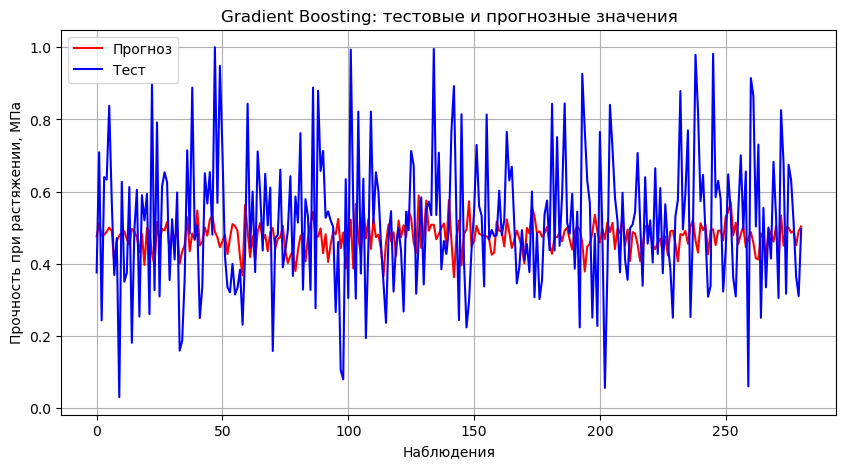

In [83]:
plt.figure(figsize = (10, 5))
plt.title('Gradient Boosting: тестовые и прогнозные значения')
plt.xlabel('Наблюдения')
plt.ylabel('Прочность при растяжении, МПа')
plt.plot(Y_pred_gboost2, label = 'Прогноз', color = 'red')
plt.plot(Y_test1.values, label = 'Тест', color = 'blue')
plt.legend()
plt.grid(True);

### 7. Стохастический градиентный спуск

In [111]:
from sklearn.linear_model import SGDRegressor

In [112]:
Stochastic_r = SGDRegressor()
Stochastic_r.fit(X_train1, Y_train1)
Y_pred_Stochastic = Stochastic_r.predict(X_test1)
mae_Stochastic = mean_absolute_error(Y_test1, Y_pred_Stochastic).round(3)
mse_Stochastic = mean_squared_error(Y_test1,Y_pred_Stochastic).round(3)
mape_Stochastic = mean_absolute_percentage_error(Y_test1, Y_pred_Stochastic).round(3)
r2_Stochastic_score = r2_score(Y_test1, Y_pred_Stochastic).round(3)

In [113]:
print(' Результаты метода стохастического градиентного спуска SGDRegressor')
print('R2 Test score:      ', r2_Stochastic_score)
print('Ср.абсолютная, Ср.абсолютная процентная, Среднеквадратичная ошибки')
print('Stochastic_MAE:     ', mae_Stochastic)
print('Stochastic_MAPE:    ', mape_Stochastic)
print('Stochastic_MSE:     ', mse_Stochastic)
print('Stochastic_RMSE:    ', np.sqrt(mse_Stochastic).round(3))

 Результаты метода стохастического градиентного спуска SGDRegressor
R2 Test score:       -0.082
Ср.абсолютная, Ср.абсолютная процентная, Среднеквадратичная ошибки
Stochastic_MAE:      0.154
Stochastic_MAPE:     0.446
Stochastic_MSE:      0.038
Stochastic_RMSE:     0.195


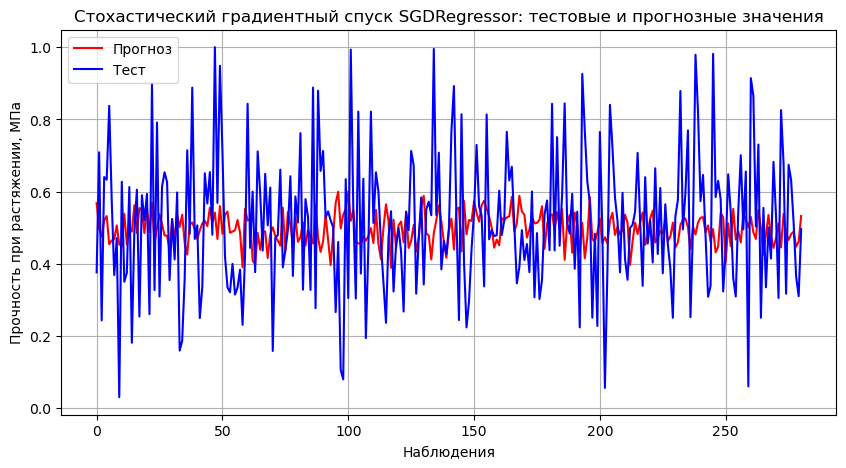

In [87]:
plt.figure(figsize = (10, 5))
plt.title('Стохастический градиентный спуск SGDRegressor: тестовые и прогнозные значения')
plt.xlabel('Наблюдения')
plt.ylabel('Прочность при растяжении, МПа')
plt.plot(Y_pred_Stochastic, label = "Прогноз", color = 'red')
plt.plot(Y_test1.values, label = "Тест", color = 'blue')
plt.legend()
plt.grid(True);

#### По заданию произведём поиск гиперпараметровпо сетке с перекрстной проверкой и количеством блоков = 10
#### В методе SGDRegressor по описанию https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html выберем параметры loss penalty tol epsilon

In [114]:
Stochastic_optim2 = SGDRegressor()
Stochastic_optim2_params = {'loss': ['squared_epsilon_insensitive', 'huber', 'epsilon_insensitive'], 
                            'penalty' : ['l2', 'l1', 'elasticnet'],  'tol': [0.001, 0.0015, 0.002],   
                            'epsilon': [0.1, 0.2]}

#### Обучаем модель. Для оценки результата используем коэффициент детерминации R^2.

In [115]:
Stochastic_gs_optim2 = GridSearchCV(Stochastic_optim2, Stochastic_optim2_params, cv = 10, verbose = 1, n_jobs= 20, scoring = 'r2')
Stochastic_gs_optim2.fit(X_train1, Y_train1)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


GridSearchCV(cv=10, estimator=SGDRegressor(), n_jobs=20,
             param_grid={'epsilon': [0.1, 0.2],
                         'loss': ['squared_epsilon_insensitive', 'huber',
                                  'epsilon_insensitive'],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'tol': [0.001, 0.0015, 0.002]},
             scoring='r2', verbose=1)

#### Выводим гиперпараметры для оптимальной модели

In [116]:
print('оптимальные гиперпараметры для модели SGDRegressor')
print(Stochastic_gs_optim2.best_estimator_)
print(Stochastic_gs_optim2.best_params_)
grid_search_Stochastic = Stochastic_gs_optim2.best_estimator_


оптимальные гиперпараметры для модели SGDRegressor
SGDRegressor(loss='epsilon_insensitive')
{'epsilon': 0.1, 'loss': 'epsilon_insensitive', 'penalty': 'l2', 'tol': 0.001}


#### Подставим найденные параметры и посмотрим на изменения

In [117]:
Stochastic_r2 = SGDRegressor(epsilon = 0.1, loss = 'epsilon_insensitive', penalty ='l2', tol = 0.001)
Stochastic_r2.fit(X_train1, Y_train1)
Y_pred_Stochastic2 = Stochastic_r2.predict(X_test1)
mae_Stochastic2 = mean_absolute_error(Y_test1, Y_pred_Stochastic2).round(3)
mse_Stochastic2 = mean_squared_error(Y_test1,Y_pred_Stochastic2).round(3)
mape_Stochastic2 = mean_absolute_percentage_error(Y_test1, Y_pred_Stochastic2).round(3)
r2_Stochastic_score2 = r2_score(Y_test1, Y_pred_Stochastic2).round(3)

In [118]:
print('Результаты оптимизации Метода SGDRegressor')
print('R2 Test score:        ', r2_Stochastic_score2) 
print('Ср.абсолютная, Ср.абсолютная процентная, Среднеквадратичная ошибки')
print('SGDRegressor_MAE:     ', mae_Stochastic2)
print('SGDRegressor_MAPE:    ', mape_Stochastic2)
print('SGDRegressor_MSE:     ', mse_Stochastic2)
print('SGDRegressor_RMSE:    ', np.sqrt(mse_Stochastic2).round(3))

Результаты оптимизации Метода SGDRegressor
R2 Test score:         -0.052
Ср.абсолютная, Ср.абсолютная процентная, Среднеквадратичная ошибки
SGDRegressor_MAE:      0.152
SGDRegressor_MAPE:     0.452
SGDRegressor_MSE:      0.037
SGDRegressor_RMSE:     0.192


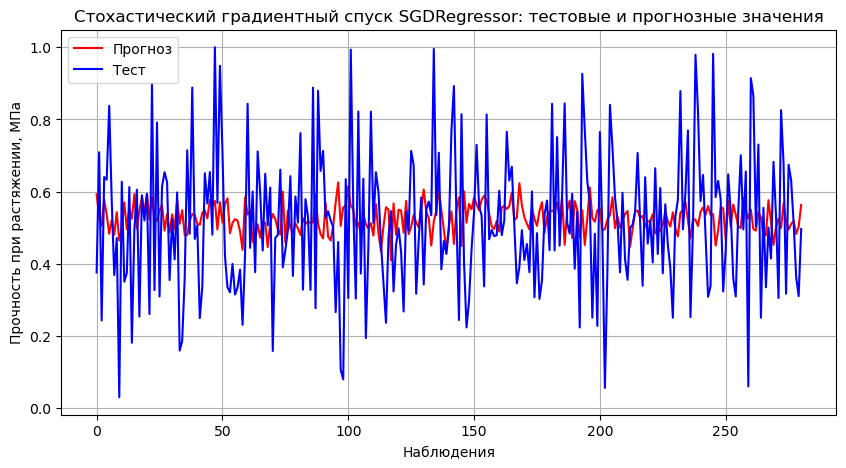

In [93]:
plt.figure(figsize = (10, 5))
plt.title('Стохастический градиентный спуск SGDRegressor: тестовые и прогнозные значения')
plt.xlabel('Наблюдения')
plt.ylabel('Прочность при растяжении, МПа')
plt.plot(Y_pred_Stochastic2, label = 'Прогноз', color = 'red')
plt.plot(Y_test1.values, label = 'Тест', color = 'blue')
plt.legend()
plt.grid(True);

### 8. Лассо регрессии

In [121]:
from sklearn import linear_model

In [122]:
lasso_r = linear_model.Lasso()
lasso_r.fit(X_train1, Y_train1)
Y_pred_lasso = lasso_r.predict(X_test1)
mae_lasso = mean_absolute_error(Y_pred_lasso, Y_test1).round(3)
mse_lasso = mean_squared_error(Y_test1, Y_pred_lasso).round(3)
mape_lasso = mean_absolute_percentage_error(Y_test1, Y_pred_lasso).round(3)
r2_lasso_score = r2_score(Y_test1, Y_pred_lasso).round(3)

In [123]:
print('Результаты метода Лассо регрессии')
print('R2 Test score:    ', r2_lasso_score)
print('Ср.абсолютная, Ср.абсолютная процентная, Среднеквадратичная ошибки')
print('lasso_MAE:        ', mae_lasso)
print('lasso_MAPE:       ', mape_lasso)
print('lasso_MSE:        ', mse_lasso)
print('lasso_RMSE:       ', np.sqrt(mse_lasso).round(3))


Результаты метода Лассо регрессии
R2 Test score:     -0.024
Ср.абсолютная, Ср.абсолютная процентная, Среднеквадратичная ошибки
lasso_MAE:         0.148
lasso_MAPE:        0.44
lasso_MSE:         0.036
lasso_RMSE:        0.19


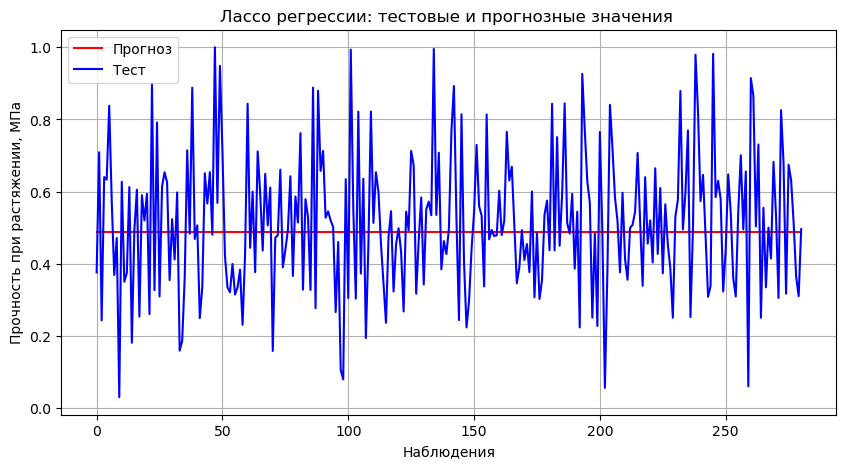

In [124]:
plt.figure(figsize = (10, 5))
plt.title('Лассо регрессии: тестовые и прогнозные значения ')
plt.xlabel('Наблюдения')
plt.ylabel('Прочность при растяжении, МПа')
plt.plot(Y_pred_lasso, label = "Прогноз", color = 'red')
plt.plot(Y_test1.values, label = "Тест", color = 'blue')
plt.legend()
plt.grid(True);

#### По заданию произведём поиск гиперпараметровпо сетке с перекрстной проверкой и количеством блоков = 10
#### В методе linear_model.Lasso по описанию https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html для GridSearchCV выберем следующие параметры: alpha, tol, selection

In [125]:
lasso_r_optim2 = linear_model.Lasso()
lasso_r_optim2_params = {'selection': ['cyclic', 'random'], 'alpha' : [1.0, 2.0, 3.0], 'tol' : [0.0001, 0.00015, 0.0002]}

#### Обучаем модель. Для оценки результата используем коэффициент детерминации R^2.

In [126]:
lasso_gs_optim2 = GridSearchCV(lasso_r_optim2, lasso_r_optim2_params, cv = 10, verbose = 1, n_jobs= 20, scoring = 'r2')
lasso_gs_optim2.fit(X_train1, Y_train1)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=Lasso(), n_jobs=20,
             param_grid={'alpha': [1.0, 2.0, 3.0],
                         'selection': ['cyclic', 'random'],
                         'tol': [0.0001, 0.00015, 0.0002]},
             scoring='r2', verbose=1)

#### Выводим гиперпараметры для оптимальной модели

In [127]:
print('оптимальные гиперпараметры для модели linear_model.Lasso')
print(lasso_gs_optim2.best_estimator_)
print(lasso_gs_optim2.best_params_)
grid_search_lasso = lasso_gs_optim2.best_estimator_


оптимальные гиперпараметры для модели linear_model.Lasso
Lasso()
{'alpha': 1.0, 'selection': 'cyclic', 'tol': 0.0001}


#### Подставим найденные параметры и посмотрим на изменения

In [128]:
lasso_r2 = linear_model.Lasso(alpha = 1.0, selection = 'cyclic', tol = 0.0001)
lasso_r2.fit(X_train1, Y_train1)
Y_pred_lasso2 = lasso_r2.predict(X_test1)
mae_lasso2 = mean_absolute_error(Y_test1, Y_pred_lasso2).round(3)
mse_lasso2 = mean_squared_error(Y_test1,Y_pred_lasso2).round(3)
mape_lasso2 = mean_absolute_percentage_error(Y_test1, Y_pred_lasso2).round(3)
r2_lasso_score2 = r2_score(Y_test1, Y_pred_lasso2).round(3)

In [129]:
print('Результаты метода Лассо регрессии')
print('R2 Test score:    ', r2_lasso_score2)
print('Ср.абсолютная, Ср.абсолютная процентная, Среднеквадратичная ошибки')
print('lasso_MAE:        ', mae_lasso2)
print('lasso_MAPE:       ', mape_lasso2)
print('lasso_MSE:        ', mse_lasso2)
print('lasso_RMSE:       ', np.sqrt(mse_lasso2).round(3))


Результаты метода Лассо регрессии
R2 Test score:     -0.024
Ср.абсолютная, Ср.абсолютная процентная, Среднеквадратичная ошибки
lasso_MAE:         0.148
lasso_MAPE:        0.44
lasso_MSE:         0.036
lasso_RMSE:        0.19


### Сравним результаты

In [130]:
error_data = {'Регрессия': ['Линейная регрессия', 'Ближайших соседей', 'Опорных векторов', 
                          'Случайный лес', 'Деревья решений', 'Градиентный бустинг', 
                          'Стохастический градиент', 'Лассо регрессии'], 
                        'MAE': [mae_linear, mae_knn, mae_svr, mae_randomf, mae_dec_tree, 
                                  mae_gboost, mae_Stochastic, mae_lasso],
                        'MSE': [mse_linear, mse_knn, mse_svr, mse_randomf, mse_dec_tree, 
                                  mse_gboost, mse_Stochastic, mse_lasso]} 
error_data = pd.DataFrame(error_data)
print(error_data)

                 Регрессия    MAE    MSE
0       Линейная регрессия  0.149  0.037
1        Ближайших соседей  0.175  0.048
2         Опорных векторов  0.168  0.047
3            Случайный лес  0.152  0.037
4          Деревья решений  0.227  0.077
5      Градиентный бустинг  0.155  0.040
6  Стохастический градиент  0.154  0.038
7          Лассо регрессии  0.148  0.036


In [ ]:
R2_test_data = {'Регрессия': ['Линейная регрессия', 'Ближайших соседей', 'Опорных векторов', 
                          'Случайный лес', 'Деревья решений', 'Градиентный бустинг', 
                          'Стохастический градиент', 'Лассо регрессии'],
            'R2 score' : [r2_linear_score, r2_knn_score, r2_svr_score, 
                                r2_randomf_score, r2_dec_tree_score, r2_gboost_score, 
                                r2_Stochastic_score, r2_lasso_score],
            'Optim R2 score' : [r2_linear_score2, r2_knn_score2, r2_svr_score2, 
                                      r2_randomf_score2, r2_dec_tree_score2, r2_gboost_score2, 
                                      r2_Stochastic_score2, r2_lasso_score2]}  
R2_test_data = pd.DataFrame(R2_test_data)
print(R2_test_data)

                 Регрессия  R2 Train score  Optim R2 Train score
0       Линейная регрессия          -0.030                -0.030
1        Ближайших соседей          -0.366                -0.138
2         Опорных векторов          -0.327                -0.333
3            Случайный лес          -0.052                -0.023
4          Деревья решений          -1.183                -0.029
5      Градиентный бустинг          -0.129                -0.068
6  Стохастический градиент          -0.082                -0.052
7          Лассо регрессии          -0.024                -0.024


### Как видим на примере семи методов, применение оптимизации даёт снижение средней абсолютной ошибки, улучшение метрики R2.. 

## Исследуем возможности перцептрона по прогнозированию значения прочности при растяжении. 

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras import utils

from sklearn.neural_network import MLPRegressor

%matplotlib inline

In [15]:
from sklearn.model_selection import GridSearchCV,  RandomizedSearchCV

In [9]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
print(tf.__version__)

2.10.0


### Создадим многослойный перцептрон

In [10]:
mlp = MLPRegressor(random_state = 1, max_iter = 500)
mlp.fit(X_train1, Y_train1)
Y_pred_mlp = mlp.predict(X_test1)
mae_mlp = mean_absolute_error(Y_test1, Y_pred_mlp).round(3)
mse_mlp = mean_squared_error(Y_test1, Y_pred_mlp).round(3)
mape_mlp = mean_absolute_percentage_error(Y_test1, Y_pred_mlp).round(3)
r2_mlp_score = r2_score(Y_test1, Y_pred_mlp).round(3)

In [11]:
print('Multi-layer Perceptron regressor Results Train:')
print('R2 Train score:     ', r2_mlp_score)
print('MLPRegressor_MAE:   ', mae_mlp)
print('MLPRegressor_MAPE:  ', mape_mlp)
print('MLPRegressor_MSE:   ', mse_mlp)
print('MLPRegressor_RMSE:  ', np.sqrt(mse_mlp).round(3))

Multi-layer Perceptron regressor Results Train:
R2 Train score:      -0.033
MLPRegressor_MAE:    0.149
MLPRegressor_MAPE:   0.43
MLPRegressor_MSE:    0.037
MLPRegressor_RMSE:   0.192


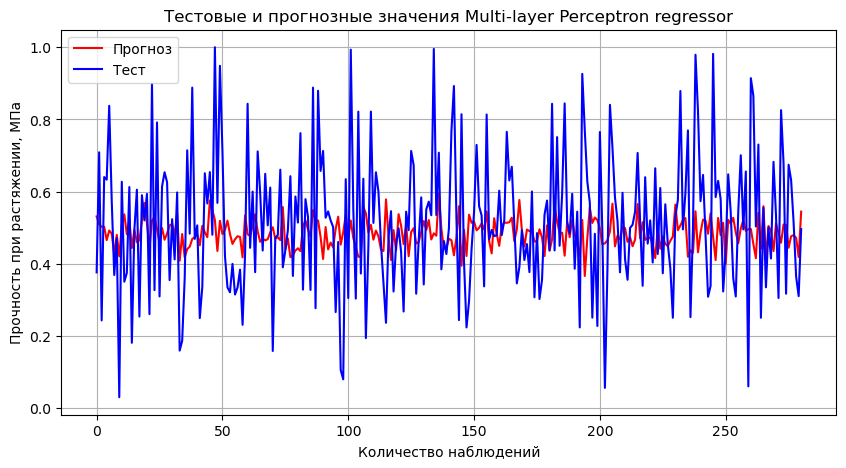

In [12]:
plt.figure(figsize = (10, 5))
plt.title('Тестовые и прогнозные значения Multi-layer Perceptron regressor')
plt.plot(Y_pred_mlp, label = 'Прогноз', color = 'red')
plt.plot(Y_test1.values, label = 'Тест', color = 'blue')
plt.xlabel('Количество наблюдений')
plt.ylabel('Прочность при растяжении, МПа')
plt.legend()
plt.grid(True);

### выбор оптимальных параметров

#### По заданию произведём поиск гиперпараметровпо сетке с перекрстной проверкой и количеством блоков = 10.     В методе  по описанию  для GridSearchCV выберем следующие параметры: 

In [13]:
MLPReg_optim2 = MLPRegressor()
MLPReg_optim2_params = {'hidden_layer_sizes' : [10, 20,], 'activation' : ['relu', 'tanh'],
                        'tol' : [0.0001, 0.0002], 'batch_size' : [200, 300,], 
                        'learning_rate' : ['constant', ], 'max_iter' : [200]}

In [16]:
MLPReg_optim2 = GridSearchCV(MLPReg_optim2, MLPReg_optim2_params, cv = 10, verbose = 1, n_jobs= 20, scoring = 'r2')
MLPReg_optim2.fit(X_train1, Y_train1)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


/home/alexander/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alexander/miniconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=10, estimator=MLPRegressor(), n_jobs=20,
             param_grid={'activation': ['relu', 'tanh'],
                         'batch_size': [200, 300],
                         'hidden_layer_sizes': [10, 20],
                         'learning_rate': ['constant'], 'max_iter': [200],
                         'tol': [0.0001, 0.0002]},
             scoring='r2', verbose=1)

In [17]:
print('оптимальные гиперпараметры для модели MLPRegressor()')
print(MLPReg_optim2.best_estimator_)
print(MLPReg_optim2.best_params_)
grid_search_MLPReg = MLPReg_optim2.best_estimator_

оптимальные гиперпараметры для модели MLPRegressor()
MLPRegressor(batch_size=200, hidden_layer_sizes=20)
{'activation': 'relu', 'batch_size': 200, 'hidden_layer_sizes': 20, 'learning_rate': 'constant', 'max_iter': 200, 'tol': 0.0001}


In [18]:
mlp2 = MLPRegressor(random_state = 1, activation = 'relu', batch_size = 200, hidden_layer_sizes = 20, 
                    learning_rate = 'constant', max_iter = 200, tol = 0.0001)
mlp2.fit(X_train1, Y_train1)
Y_pred_mlp2 = mlp2.predict(X_test1)
mae_mlp2 = mean_absolute_error(Y_test1, Y_pred_mlp2).round(3)
mse_mlp2 = mean_squared_error(Y_test1, Y_pred_mlp2).round(3)
mape_mlp2 = mean_absolute_percentage_error(Y_test1, Y_pred_mlp2).round(3)
r2_mlp_score2 = r2_score(Y_test1, Y_pred_mlp2).round(3)


In [19]:
print('Multi-layer Perceptron regressor Results Train after optimization:')
print('R2 Test score:       ', r2_mlp_score2)
print('MLPRegressor_MAE:    ', mae_mlp2)
print('MLPRegressor_MAPE:   ', mape_mlp2)
print('MLPRegressor_MSE:    ', mse_mlp2)
print('MLPRegressor_RMSE:   ', np.sqrt(mse_mlp2).round(3))

Multi-layer Perceptron regressor Results Train after optimization:
R2 Test score:        -0.075
MLPRegressor_MAE:     0.152
MLPRegressor_MAPE:    0.445
MLPRegressor_MSE:     0.038
MLPRegressor_RMSE:    0.195


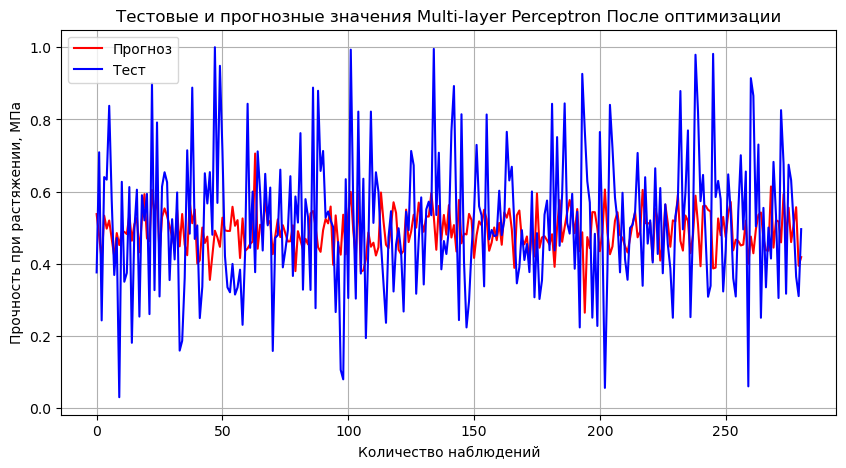

In [20]:
plt.figure(figsize = (10, 5))
plt.title('Тестовые и прогнозные значения Multi-layer Perceptron После оптимизации')
plt.plot(Y_pred_mlp2, label = "Прогноз", color = 'red')
plt.plot(Y_test1.values, label = "Тест", color = 'blue')
plt.xlabel('Количество наблюдений')
plt.ylabel('Прочность при растяжении, МПа')
plt.legend()
plt.grid(True);

### Параллельно на аналогичных исходных данных в Google Colab проведён поиск по сетке для многослойного перцептрона. Исследовано : totalling 2700 fits

#### Оптимальные гиперпараметры для модели MLPRegressor  (batch_size=200, hidden_layer_sizes=150, learning_rate='invscaling', tol=0.00015 'activation': 'relu', 'batch_size': 200, 'hidden_layer_sizes': 150, 'learning_rate': 'invscaling', 'max_iter': 200, 'tol': 0.00015

In [27]:
mlp3 = MLPRegressor(random_state = 1, activation = 'relu', batch_size = 200, hidden_layer_sizes = 150, 
                    learning_rate = 'invscaling', max_iter = 200, tol = 0.00015)
mlp3.fit(X_train1, Y_train1)
Y_pred_mlp3 = mlp3.predict(X_test1)
mae_mlp3 = mean_absolute_error(Y_test1, Y_pred_mlp3).round(3)
mse_mlp3 = mean_squared_error(Y_test1, Y_pred_mlp3).round(3)
mape_mlp3 = mean_absolute_percentage_error(Y_test1, Y_pred_mlp3).round(3)
r2_mlp_score3 = r2_score(Y_test1, Y_pred_mlp3).round(3)

In [28]:
print('Multi-layer Perceptron regressor Results Train after optimization:')
print('R2 Test score:       ', r2_mlp_score3)
print('MLPRegressor_MAE:    ', mae_mlp3)
print('MLPRegressor_MAPE:   ', mape_mlp3)
print('MLPRegressor_MSE:    ', mse_mlp3)
print('MLPRegressor_RMSE:   ', np.sqrt(mse_mlp3).round(3))

Multi-layer Perceptron regressor Results Train after optimization:
R2 Test score:        -0.182
MLPRegressor_MAE:     0.161
MLPRegressor_MAPE:    0.464
MLPRegressor_MSE:     0.042
MLPRegressor_RMSE:    0.205


## Сравним результаты

In [30]:
print('Регрессия : Multi-layer Perceptron regressor')

error_data_mpl = {'Параметры': ['локально до оптимизации', 'локально после оптимизации', 'Colab после оптимизации'], 
                  'MAE': [mae_mlp, mae_mlp2, mae_mlp3], 
                  'MSE': [mse_mlp, mse_mlp2, mse_mlp3],                   
                  'R2 score' : [r2_mlp_score, r2_mlp_score2, r2_mlp_score3]} 
error_data_mpl = pd.DataFrame(error_data_mpl)
print(error_data_mpl.T)

Регрессия : Multi-layer Perceptron regressor
                                 0                           1  \
Параметры  локально до оптимизации  локально после оптимизации   
MAE                          0.149                       0.152   
MSE                          0.037                       0.038   
R2 score                    -0.033                      -0.075   

                                 2  
Параметры  Colab после оптимизации  
MAE                          0.161  
MSE                          0.042  
R2 score                    -0.182  


In [31]:
print('Регрессия : Multi-layer Perceptron regressor')

error_data_mpl = {'Параметры': ['MAE', 'MSE', 'RMSE'], 
                  'локально до оптимизации   ': [mae_mlp,  mse_mlp, r2_mlp_score], 
                  'локально после оптимизации': [mae_mlp2, mse_mlp2, r2_mlp_score2],                   
                  'Colab после оптимизации   ': [mae_mlp3, mse_mlp3, r2_mlp_score3]} 
error_data_mpl = pd.DataFrame(error_data_mpl)
print(error_data_mpl.T)

Регрессия : Multi-layer Perceptron regressor
                                0      1      2
Параметры                     MAE    MSE   RMSE
локально до оптимизации     0.149  0.037 -0.033
локально после оптимизации  0.152  0.038 -0.075
Colab после оптимизации     0.161  0.042 -0.182
